# MNIST Handwritten Digit Classification using Logistic Regression

## Introduction
The MNIST dataset is a collection of 28x28 pixel grayscale images of handwritten digits (0-9), widely used for machine learning and deep learning projects. Logistic Regression is a simple yet powerful classification algorithm that can be extended to solve multiclass problems using techniques like **One-vs-Rest (OvR)** or **Softmax Regression**.

In this project, we use Logistic Regression to classify handwritten digits from the MNIST dataset.

---

## How Logistic Regression Works for Image Data

Logistic Regression is a supervised learning algorithm used for binary classification. It predicts the probability of a sample belonging to a class using the **logistic (sigmoid) function**. For multiclass classification, Logistic Regression can be extended as follows:

### 1. **Flattening the Image Data**
- Each MNIST image is a 28x28 matrix of pixel intensities.  
- For Logistic Regression, the image is flattened into a 1D vector of size 784 (28x28 = 784 features).
- The input matrix for training, therefore, has the shape `(60000, 784)` for 60,000 training samples.

### 2. **Multiclass Classification**
- Logistic Regression is naturally a binary classifier, but for 10-digit classification, we use the **Softmax Regression** approach:
  - Each digit class (0-9) is assigned a separate weight vector.
  - The model computes logits for each class and applies the softmax function to convert logits into probabilities.
  - The predicted class is the one with the highest probability.

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [3]:
X_train.shape[0]

60000

### Flattening 
The -1 is a placeholder that tells NumPy to calculate the appropriate size for this dimension based on the original array's size. This is useful for feeding image data into machine learning models that expect a 2D array of shape (samples, features).

In [4]:
X_train = X_train.reshape(60000, -1)
X_train.shape

(60000, 784)

In [5]:
X_test = X_test.reshape(10000, -1)

## Model Building

In [6]:
logr = LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial', verbose=1)

##### solver='saga': The saga solver is a variation of the Stochastic Average Gradient Descent. It's particularly useful for large datasets and supports L1 (Lasso) and L2 (Ridge) regularization, as well as elastic net regularization.

##### multi_class='multinomial': This parameter specifies the strategy used for handling multi-class classification. The 'multinomial' option indicates that the model should use a softmax approach, which is suitable for situations where classes are not mutually exclusive.

In [7]:
logr.fit(X_train, y_train)

c:\Users\aman2\anaconda3\envs\sklearn-venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


max_iter reached after 1232 seconds


c:\Users\aman2\anaconda3\envs\sklearn-venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga',
                   verbose=1)

In [8]:
y_pred = logr.predict(X_test)

In [9]:
accuracy = logr.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.30%


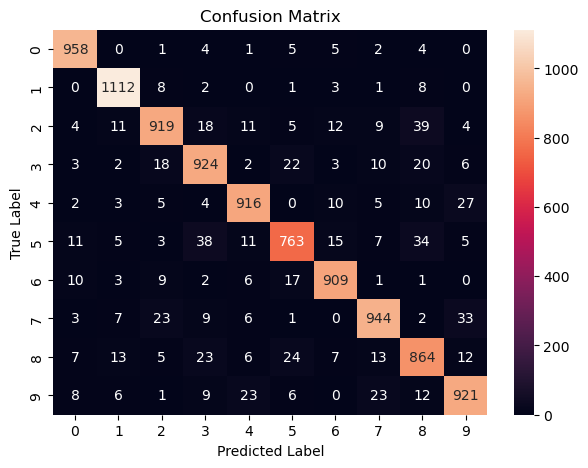

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()